### __Project Justification:__
The justification for this project is grounded in the increasing importance of health and well-being in today's society. With the growing interest in physical activity and awareness of the importance of maintaining a healthy lifestyle, the ability to predict calorie expenditure during exercise can be of great utility for individuals of all ages.

The Bayesian linear regression approach provides a robust tool for modeling the relationship between various predictor variables, such as age, gender, exercise duration, heart rate, body temperature, among others, and the variable of interest, which in this case is the amount of calories burned. Through this model, we can obtain more accurate and useful predictions to help individuals plan their exercise routines more effectively.

### __Explanation of the Data of Interest:__
The dataset used in this project contains relevant information for predicting calorie expenditure during exercise. The included variables are:

- User_ID: Unique user identification.
- Gender: User's gender (can be male or female).
- Age: User's age.
- Height: User's height.
- Weight: User's weight.
- Duration: Exercise duration in minutes.
- Heart_Rate: Heart rate during exercise.
- Body_Temp: Body temperature during exercise.
- Calories: Amount of calories burned, the target variable.

These data provide a wide range of information that can influence the amount of calories burned during exercise, thus allowing the construction of a robust Bayesian linear regression model.

### __Project Application:__

The practical application of this project lies in its ability to provide users with a more accurate estimate of the calories they will burn during their exercise sessions. This can be especially valuable for personalized routine planning and fitness goals.

Potential benefits include:

* Routine Optimization: Users can tailor their exercise routines to efficiently achieve specific calorie-burning goals.

* Performance Improvement: The ability to foresee the amount of calories burned allows users to adjust exercise intensity and duration to maximize results.

* Personalization: By taking individual factors such as age, gender, and other variables into account, the model offers more personalized predictions, providing users with more relevant information for their specific needs.


### __Realization of the project__ 
The project was carried out by the university team formed by Maria Paula Perez Romo, Dafne Tamayo Leon and Patricio Villanueva Gio. their github links are the following 

- Dafne: https://github.com/dafnetamayo
- Maria Paula: https://github.com/Maria-Paula-PR

In turn direct thanks to the teacher of the subject Esteban Jimenez Rodriguez whose link to his github profile is:https://github.com/esjimenezro


### we import the necessary libraries

In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Linear Regression to verify implementation and BayesianRidge to build the Bayesian model
from sklearn.linear_model import LinearRegression, BayesianRidge

# Scipy for statistics
import scipy

# Train-Test and mean squared error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load exercise data from 'exercise.csv'
exercise = pd.read_csv('exercise.csv')

# Load calories data from 'calories.csv'
calories = pd.read_csv('calories.csv')

# Merge exercise and calories dataframes on 'User_ID'
df = pd.merge(exercise, calories, on='User_ID')

# Filter rows where 'Calories' is less than 300
df = df[df['Calories'] < 300]

# Reset the index of the dataframe
df = df.reset_index()

# Add a new column 'Intercept' with constant value 1
df['Intercept'] = 1

# Display the first few rows of the dataframe
df.head()

,index,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Intercept
0,0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1


__Data cleaning__

In [4]:
mapeo = {'male':0, 'female':1}

df['Gender'] = df['Gender'].map(mapeo)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       14998 non-null  int64  
 1   User_ID     14998 non-null  int64  
 2   Gender      14998 non-null  int64  
 3   Age         14998 non-null  int64  
 4   Height      14998 non-null  float64
 5   Weight      14998 non-null  float64
 6   Duration    14998 non-null  float64
 7   Heart_Rate  14998 non-null  float64
 8   Body_Temp   14998 non-null  float64
 9   Calories    14998 non-null  float64
 10  Intercept   14998 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 1.3 MB


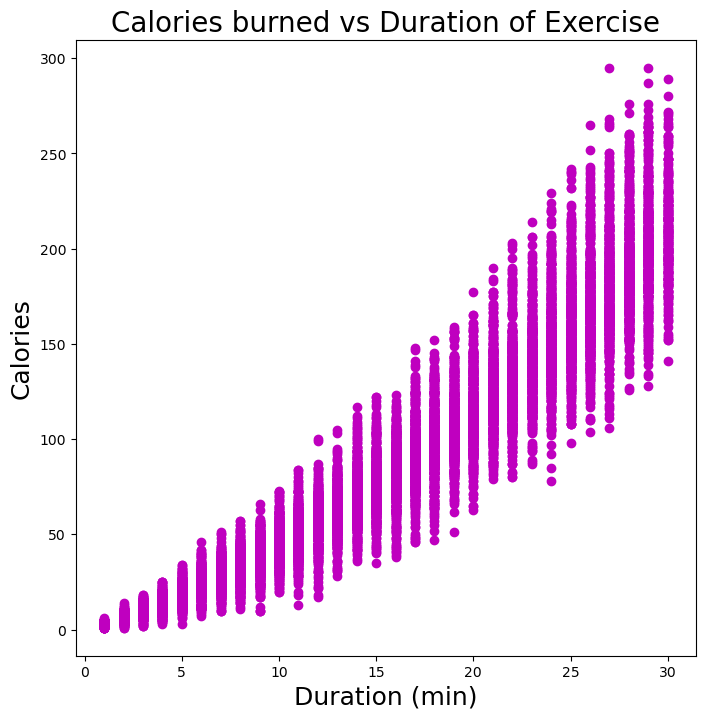

In [6]:
plt.figure(figsize=(8, 8))
# Plot 'Duration' against 'Calories' using magenta circles ('mo')
plt.plot(df['Duration'], df['Calories'], 'mo')
plt.xlabel('Duration (min)', size=18)
plt.ylabel('Calories', size=18)
plt.title('Calories burned vs Duration of Exercise', size=20)
plt.show()

One of the most common and most important observations would be to try to predict the amount of calories burned only with exercise, this will allow us to give a more generic answer to certain scenarios where we do not seek to investigate the characteristics of the individual or his training.  

In [7]:
X1 = df.loc[:, ['Intercept', 'Duration']]
y1 = df.loc[:, 'Calories']

In [8]:
X1.head()

,Intercept,Duration
0,1,29.0
1,1,14.0
2,1,5.0
3,1,13.0
4,1,10.0


In [9]:
y1.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

__Ordinary Least squares linear regression by hand__

In [10]:
def linear_regression(X, y):
    # Calculate the coefficients using the formula: (X^T * X)^-1 * X^T * y
    _coeffs = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
    
    return _coeffs

In [11]:
# Run the by hand implementation
by_hand_coefs = linear_regression(X1, y1)

Text(0.5, 1.0, 'Calories burned vs Duration of Exercise')

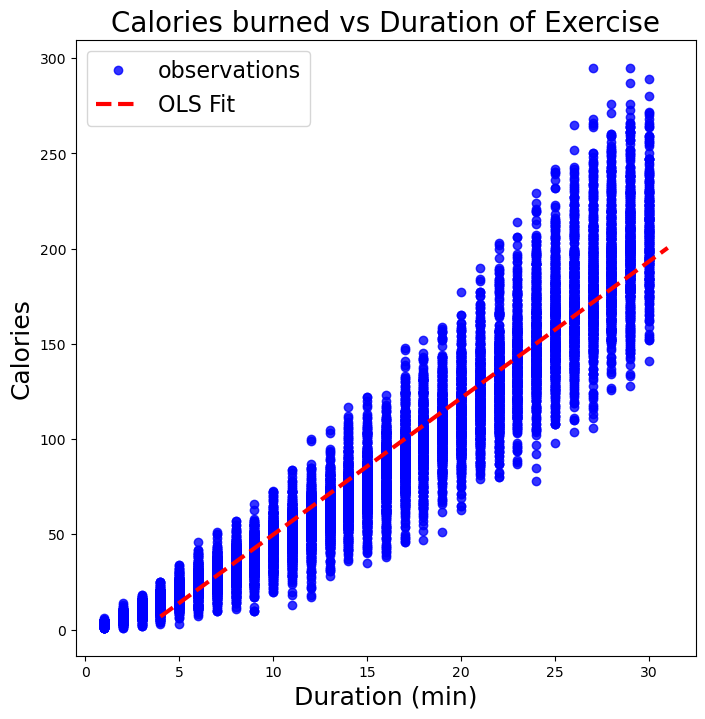

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of x values for the regression line
xs = np.linspace(4, 31, 1000)

# Calculate y values for the regression line using the coefficients obtained by hand
ys = by_hand_coefs[0] + by_hand_coefs[1] * xs
plt.figure(figsize=(8, 8))
plt.plot(df['Duration'], df['Calories'], 'bo', label='observations', alpha=0.8)
plt.xlabel('Duration (min)', size=18)
plt.ylabel('Calories', size=18)

# Plot the regression line as a red dashed line ('r--')
plt.plot(xs, ys, 'r--', label='OLS Fit', linewidth=3)
plt.legend(prop={'size': 16})

plt.title('Calories burned vs Duration of Exercise', size=20)


Graphically it seems to return a good result. As expected the duration of exercise is totally related to the direct calorie burn and therefore this linear regression can predict with some ease the target variable.

Prediction of Datapoint: we will create a prediction based on the number of minutes  spent in a generic exercise, this means that we will seek to predict the target variable only by passing as an attribute the time of duration.

In [13]:
print('Exercising for 15.5 minutes will burn an estimated {:.2f} calories.'.format(
    by_hand_coefs[0] + by_hand_coefs[1] * 15.5))

Exercising for 15.5 minutes will burn an estimated 89.30 calories.


Verify with Scikit-learn Implementation

In [14]:
linear_regression = LinearRegression()
linear_regression.fit(np.array(X1.Duration).reshape(-1,1),y1)

LinearRegression()

In [15]:
new_duration_value = 15.5

# Reshape the new duration value as the model expects a 2D array
new_duration_value_reshape = np.array(new_duration_value).reshape(-1, 1)

# Use the trained model to make the prediction
prediction = linear_regression.predict(new_duration_value_reshape)

print("The prediction for the new duration value is:", prediction)

The prediction for the new duration value is: [89.30353939]


As we can see, both models return exactly the same result and this is very good as it indicates that we managed to implement the linear regression by hand and resulted in a "good" predictive model. 

__Bayesian Linear Regression__ (only duration)

Mean Squared Error: 335.65596279905805
R-squared (R²): 0.9127566471888006


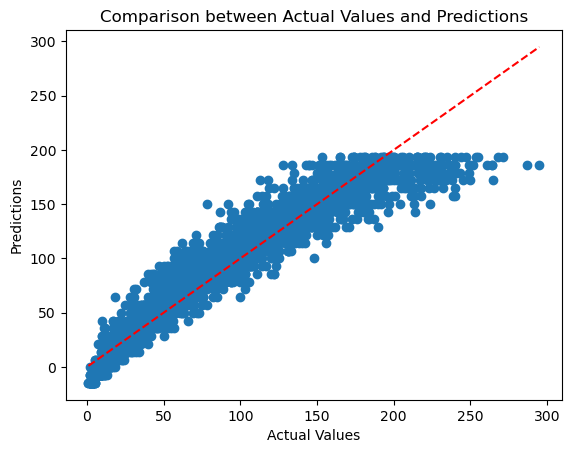

In [16]:
# Define the features (X) and the target variable (y)
X = df[['Duration']]
y = df['Calories']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Bayesian Ridge regression model
regressor = BayesianRidge()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R²): {r2}')

# Plot the results
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Comparison between Actual Values and Predictions')
plt.show()

now we will implement the Bayesian linear regression model in order to determine if the resulting value is similar to those obtained previously in the linear regression. 

In [17]:
new_data = np.array([15.5])

# Reshape the new data as the model expects a 2D array
new_data_reshape = new_data.reshape(1, -1)

# Make a prediction on the new data
prediction_new_data = regressor.predict(new_data_reshape)

# Print the prediction
print("Prediction for the new data:", prediction_new_data)

Prediction for the new data: [89.37148851]


as we can see, the result is similar to the others, we can now state that based on the benchmark given by the linear regression model, the set evaluated in the Bayesian regression fits the prediction "adequately".

__Bayesian Linear Regression__ (all data)

Mean Squared Error: 129.79387499766082
R-squared (R²): 0.9662641094329892


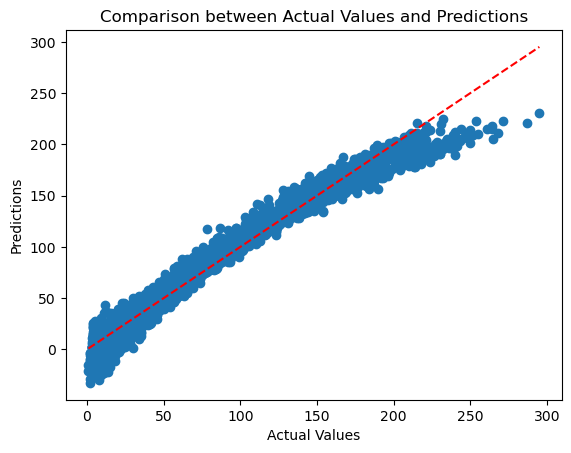

In [18]:
# Define the features (X) and the target variable (y)
X = df[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]
y = df['Calories']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Bayesian Ridge regression model
regressor = BayesianRidge()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R²): {r2}')

# Plot the results
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Comparison between Actual Values and Predictions')
plt.show()

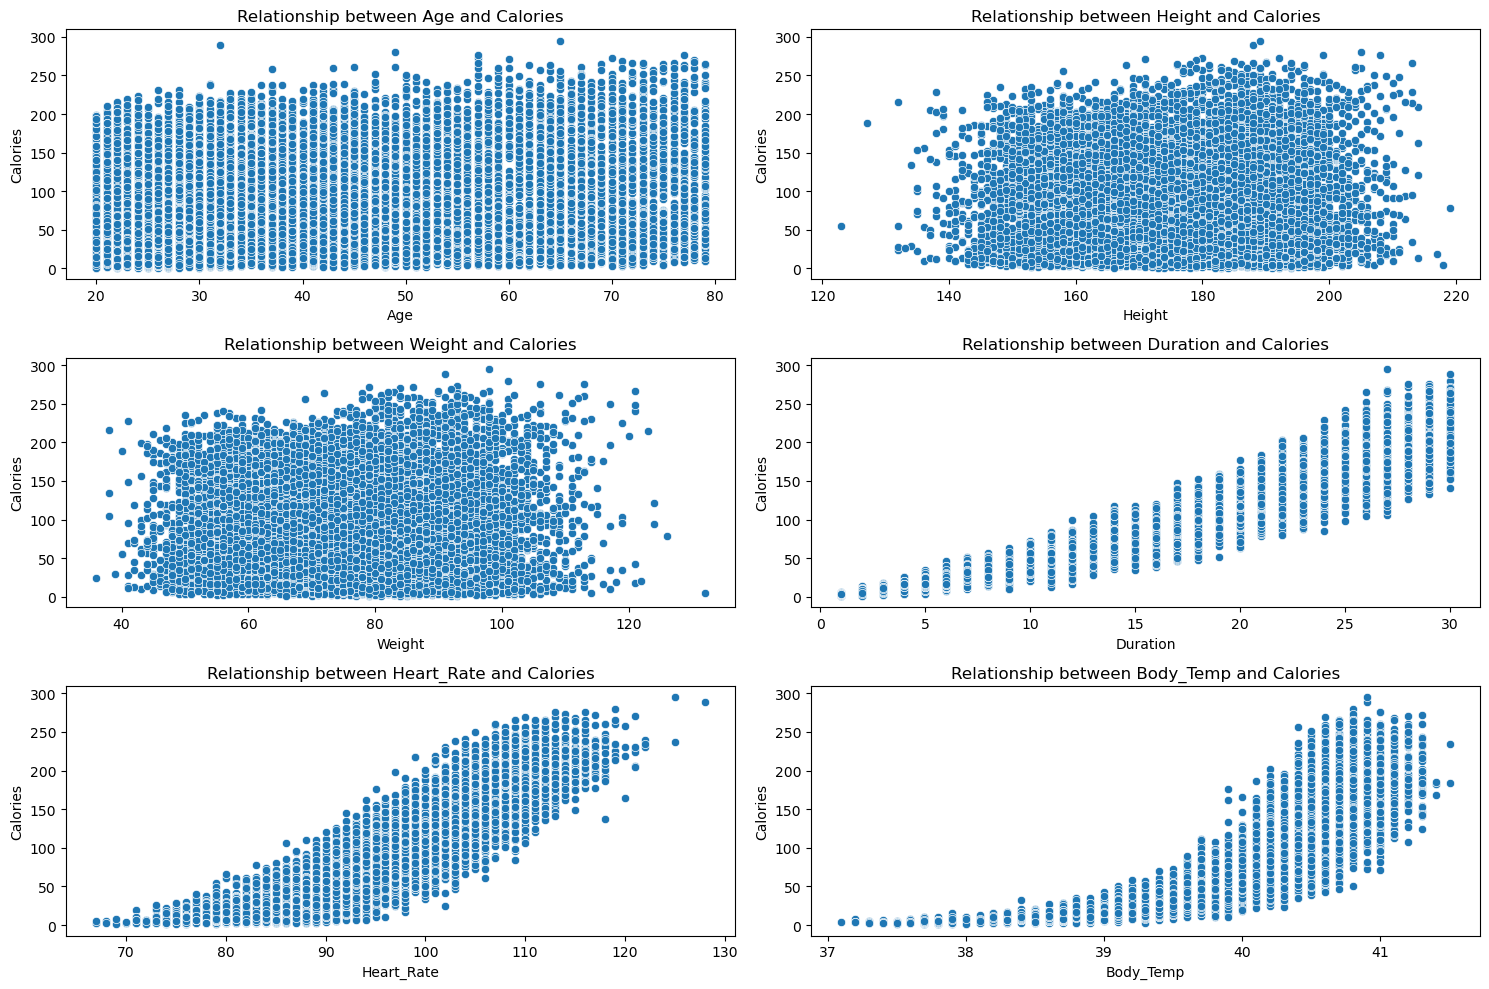

In [19]:
# Concatenate X_train and y_train to have a complete DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Visualize the relationship of each feature with the target variable
plt.figure(figsize=(15, 10))

for i, column in enumerate(train_data.columns[:-1]):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=column, y='Calories', data=train_data)
    plt.title(f'Relationship between {column} and Calories')

plt.tight_layout()
plt.show()

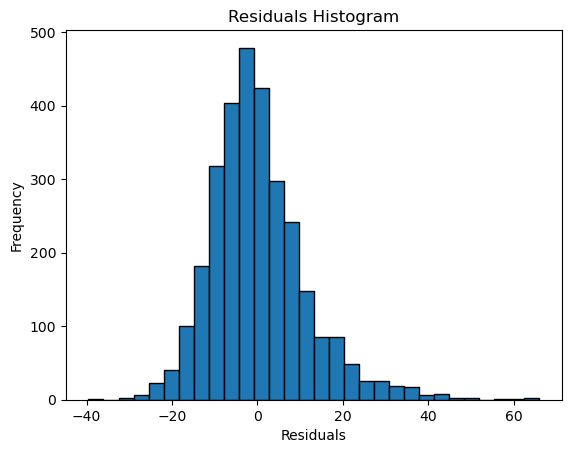

In [20]:
residuals = y_test - y_pred

# Plot a histogram of residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Histogram')
plt.show()

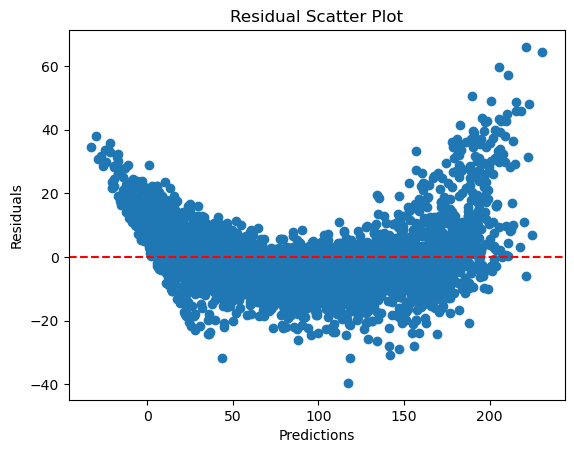

In [21]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residual Scatter Plot')
plt.show()

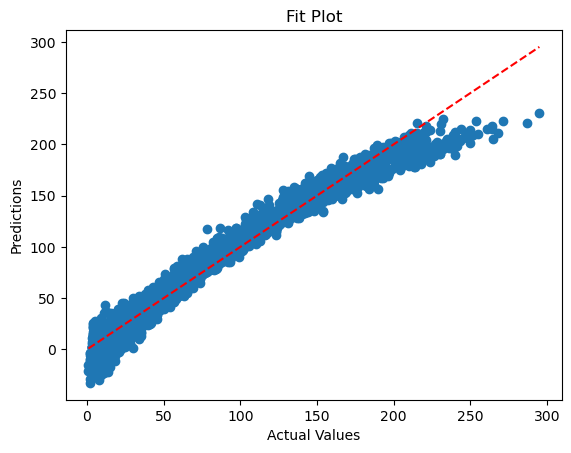

In [22]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Fit Plot')
plt.show()

In [23]:
new_data = np.array([19, 159, 55, 25, 118, 38.5])

# Reshape the new data as the model expects a 2D array
new_data_reshape = new_data.reshape(1, -1)

# Make a prediction on the new data
prediction_new_data = regressor.predict(new_data_reshape)

# Print the prediction
print("Prediction for the new data:", prediction_new_data)

Prediction for the new data: [208.25165528]


In order to have a more "real" comparison, Patricio tried to predict with this model his exercise performed on 11/26/2023. I am a 19 year old male who is 1.58 years old. I went swimming for 25 minutes specifically and the result marked by my calorie confidence meter was 
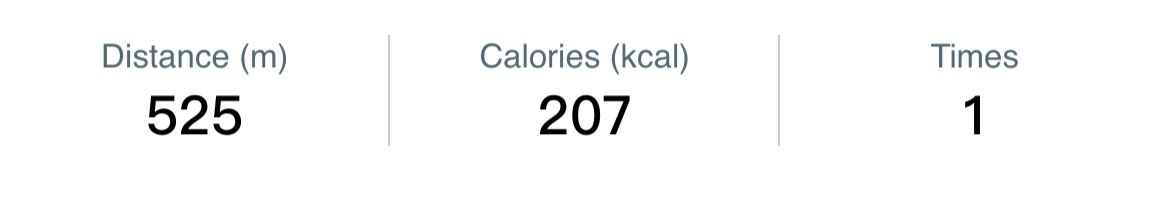

In [24]:
new_data = np.array([19,163,55,68,140,44])

# Reshape the new data as the model expects a 2D array
new_data_reshape = new_data.reshape(1, -1)

# Make a prediction on the new data
prediction_new_data = regressor.predict(new_data_reshape)

# Print the prediction
print("Prediction for the new data:", prediction_new_data)

Prediction for the new data: [443.9203083]


In order to have a more "real" comparison, Maria Paula tried to predict with this model her exercise performed on 11/06/2023. She is a 19 year old woman who is 1.63 years old. she went to train football at the iteso fields for 68 minutes. And this is the result obtained by your apple watch.
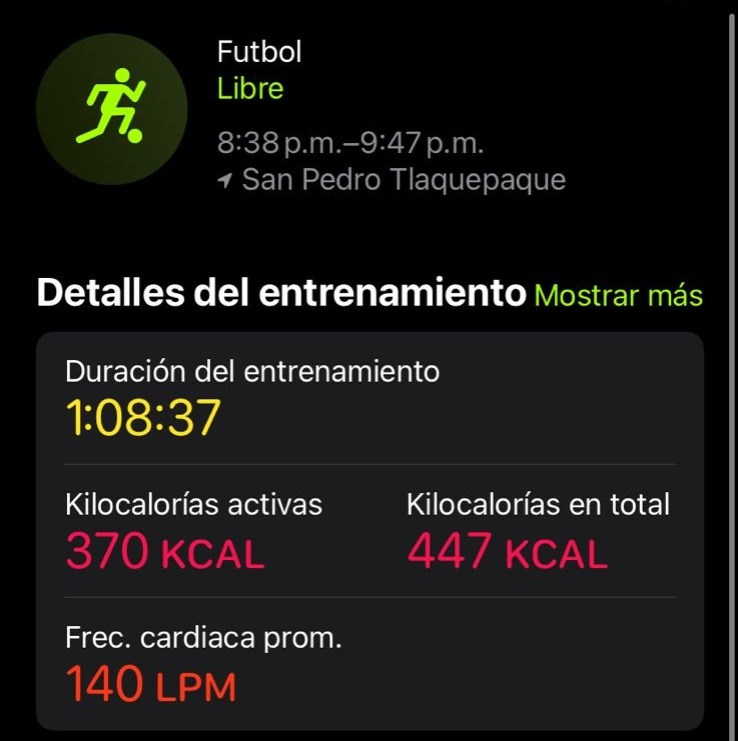

### __Project Justification:__

This project is motivated by the increasing emphasis on health and fitness, where individuals often set specific calorie-burning goals for their exercise routines. The classification aspect of the project is aimed at determining whether an exercise session successfully achieved the stated goal of burning, for example, 300 or more calories. This is particularly relevant in the context of personalized fitness plans, where users strive to monitor and attain specific calorie-burning milestones.

### __Explanation of the Data of Interest:__

The dataset utilized in this project comprises pertinent information for classifying exercise sessions based on whether they met the predefined calorie-burning goal. The dataset includes the following variables:

- User_ID: Unique user identification.
- Gender: User's gender (male or female).
- Age: User's age.
- Height: User's height.
- Weight: User's weight.
- Duration: Exercise duration in minutes.
- Heart_Rate: Heart rate during exercise.
- Body_Temp: Body temperature during exercise.
- Calories: Amount of calories burned during the exercise session, the target variable.
These data elements offer diverse information to create a robust Bayesian classification model that can categorize exercise sessions as successful or not in meeting the calorie-burning objective.

### __Project Application:__

The practical application of this classification project lies in its ability to assess whether an exercise session achieved its intended calorie-burning goal. The benefits include:

- Goal Evaluation: Users can receive feedback on whether their exercise sessions met the targeted calorie-burning objectives.

- Adaptation of Workouts: Individuals can adjust and tailor their workout routines based on the classification results to better align with their fitness goals.

- Objective Monitoring: The model provides a systematic approach to monitor and evaluate progress toward specific calorie-burning targets.

### we import the necessary libraries and declare the df

In [25]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [27]:
# Load exercise data from 'exercise.csv'
exercise = pd.read_csv('exercise.csv')

# Load calories data from 'calories.csv'
calories = pd.read_csv('calories.csv')

# Merge exercise and calories dataframes on 'User_ID'
dfc = pd.merge(exercise, calories, on='User_ID')

# Reset the index of the dataframe
dfc = df.reset_index()

# Min calories
min_calories = 150

# Display the first few rows of the dataframe
dfc.head()

,level_0,index,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Intercept
0,0,0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,1,1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,2,2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,3,3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,4,4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0,1


In [28]:
dfc.Calories.max()

295.0

__Data cleaning and adjusting the classes__

In [29]:
dfc['Calories'] = dfc['Calories'].apply(lambda x: 1 if x >= min_calories else 0)

In [30]:
dfc.Calories.unique()

array([1, 0], dtype=int64)

In [31]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   level_0     14998 non-null  int64  
 1   index       14998 non-null  int64  
 2   User_ID     14998 non-null  int64  
 3   Gender      14998 non-null  int64  
 4   Age         14998 non-null  int64  
 5   Height      14998 non-null  float64
 6   Weight      14998 non-null  float64
 7   Duration    14998 non-null  float64
 8   Heart_Rate  14998 non-null  float64
 9   Body_Temp   14998 non-null  float64
 10  Calories    14998 non-null  int64  
 11  Intercept   14998 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 1.4 MB


__we create the Bayesian classification model with the logistic regression and all variables__

In [32]:
X = dfc.drop('Calories', axis=1)
y = dfc['Calories']

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   level_0     14998 non-null  int64  
 1   index       14998 non-null  int64  
 2   User_ID     14998 non-null  int64  
 3   Gender      14998 non-null  int64  
 4   Age         14998 non-null  int64  
 5   Height      14998 non-null  float64
 6   Weight      14998 non-null  float64
 7   Duration    14998 non-null  float64
 8   Heart_Rate  14998 non-null  float64
 9   Body_Temp   14998 non-null  float64
 10  Intercept   14998 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.3 MB


In [34]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Fit the Bayesian Ridge regression model
classifier = BayesianRidge()
classifier.fit(X_train, y_train)

BayesianRidge()

In [36]:
# Make predictions on the test set
y_pred = np.round(classifier.predict(X_test))

# Evaluate the model performances
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


In [37]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2405
           1       0.87      0.91      0.89       595

    accuracy                           0.95      3000
   macro avg       0.92      0.94      0.93      3000
weighted avg       0.96      0.95      0.96      3000

Confusion Matrix:
[[2324   81]
 [  55  540]]


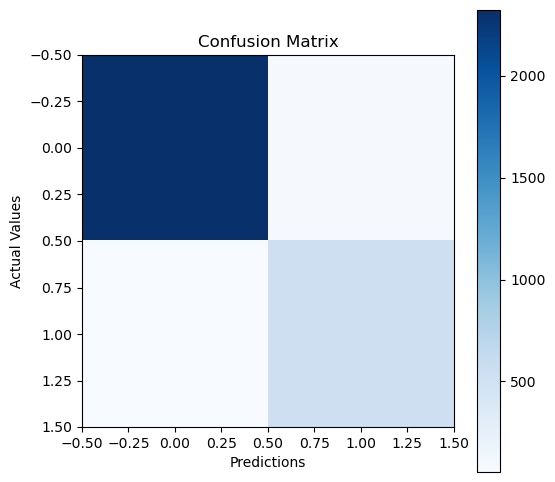

In [38]:
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.show()

Predictions with the classification model